### Оценка ценовой категории телефона
Предметная область: Мобильные телефоны - классификация ценовых категорий

Тип данных: Синтетические данные

Источник данных: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

#### Атрибуты
1. battery_power [int64\] - Объем батареи в мАч
2. blue [int64\] - Поддержка Bluetooth
3. clock_speed [float64\] - Скорость процессора
4. dual_sim [int64\] - Поддержка двух SIM-карт
5. fc [int64\] - Разрешение фронтальной камеры в МП
6. four_g [int64\] - Поддержка 4G
7. int_memory [int64\] - Объем встроенной памяти в ГБ
8. m_dep [float64\] - Толщина телефона в см
9. mobile_wt [int64\] - Вес телефона в граммах
10. n_cores [int64\] - Количество ядер процессора
11. pc [int64\] - Разрешение основной камеры в МП
12. px_height [int64\] - Высота экрана в пикселях
13. px_width [int64\] - Ширина экрана в пикселях
14. ram [int64\] - Объем оперативной памяти в ГБ
15. sc_h [int64\] - Длина телефона в см
16. sc_w [int64\] - Ширина телефона в см
17. talk_time [int64\] - Максимальное время разговора в часах
18. three_g [int64\] - Поддержка 3G
19. touch_screen [int64\] - Наличие сенсорного экрана
20. wifi [int64\] - Поддержка WiFi
21. price_range [int64\] - Ценовая категория телефона (от 0 до 3)

#### Задача
Выявить зависимость ценовой категории телефона от его характеристик. Найти наиболее значимые характеристики.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'data/raw/train.csv')
df.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
943,1428,1,1.6,0,0,0,7,0.1,153,4,...,584,983,1808,12,8,13,0,1,0,1
1185,1136,0,0.5,0,0,1,9,0.9,150,6,...,1307,1767,2110,9,5,16,1,0,1,2
1574,1628,1,1.8,1,11,0,56,0.1,136,2,...,500,1713,3358,17,11,12,1,1,1,3
1206,1816,1,1.6,1,0,0,50,0.1,186,5,...,800,1089,3637,11,7,16,0,0,1,3
619,598,0,2.3,1,7,0,21,0.7,196,2,...,680,1173,3293,8,4,7,1,0,1,2
367,825,0,2.9,1,0,0,34,0.8,99,8,...,1471,1866,2915,8,2,10,1,1,0,3
1958,1976,1,2.6,1,6,0,45,1.0,136,4,...,652,1933,2470,11,1,3,0,0,0,3
1879,983,0,1.8,0,0,1,53,0.9,187,1,...,1001,1176,1389,17,8,8,1,1,1,1
634,1397,0,2.9,1,13,0,9,0.5,87,6,...,1308,1991,3137,12,1,11,1,1,1,3
736,503,0,2.5,0,3,0,57,0.6,185,6,...,778,1291,305,11,8,16,0,0,1,0


In [4]:
# Проверка на наличие дубликатов и пустых значений.
print('Количество отсутствующих значений:', df.isnull().sum().sum())
print('Количество дубликатов:', df.duplicated().sum())
df.describe()

Количество отсутствующих значений: 0
Количество дубликатов: 0


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Разбиение для визуализации распределений.
df_boolean = df[[col for col in df.columns if set(df[col].unique()) <= {0, 1}]]
df_numeric = df[[col for col in df.columns if col not in df_boolean.columns]]

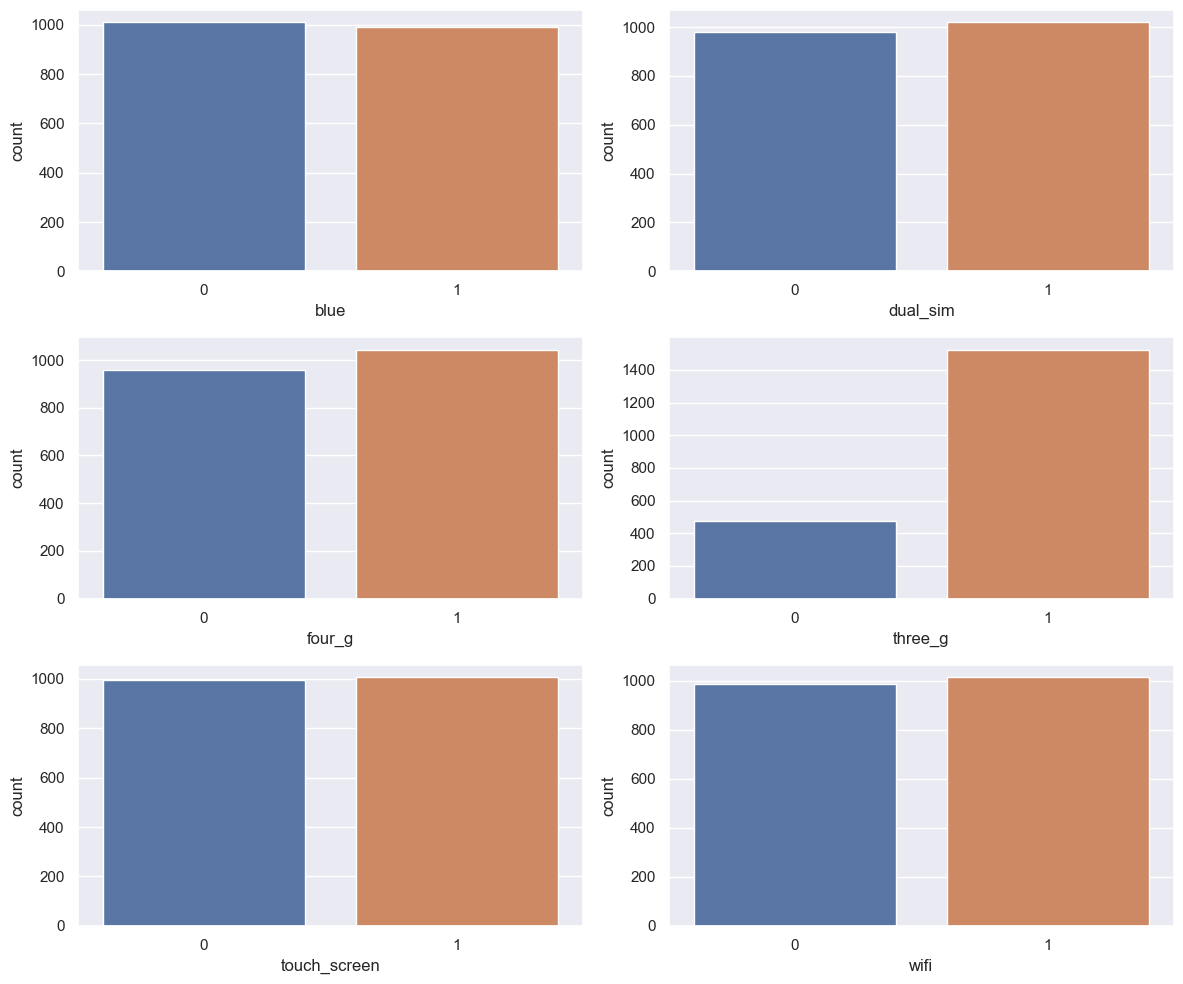

In [6]:
# Визуализация булевых признаков.
cols, rows = 3, 2
sns.set()
fig, axes = plt.subplots(cols, rows, figsize=(cols * 4, rows * 5))
axes = axes.flatten()

for i, column in enumerate(df_boolean.columns):
    sns.countplot(x=df[column], ax=axes[i], hue=df[column], legend=False)

plt.tight_layout()
plt.show()

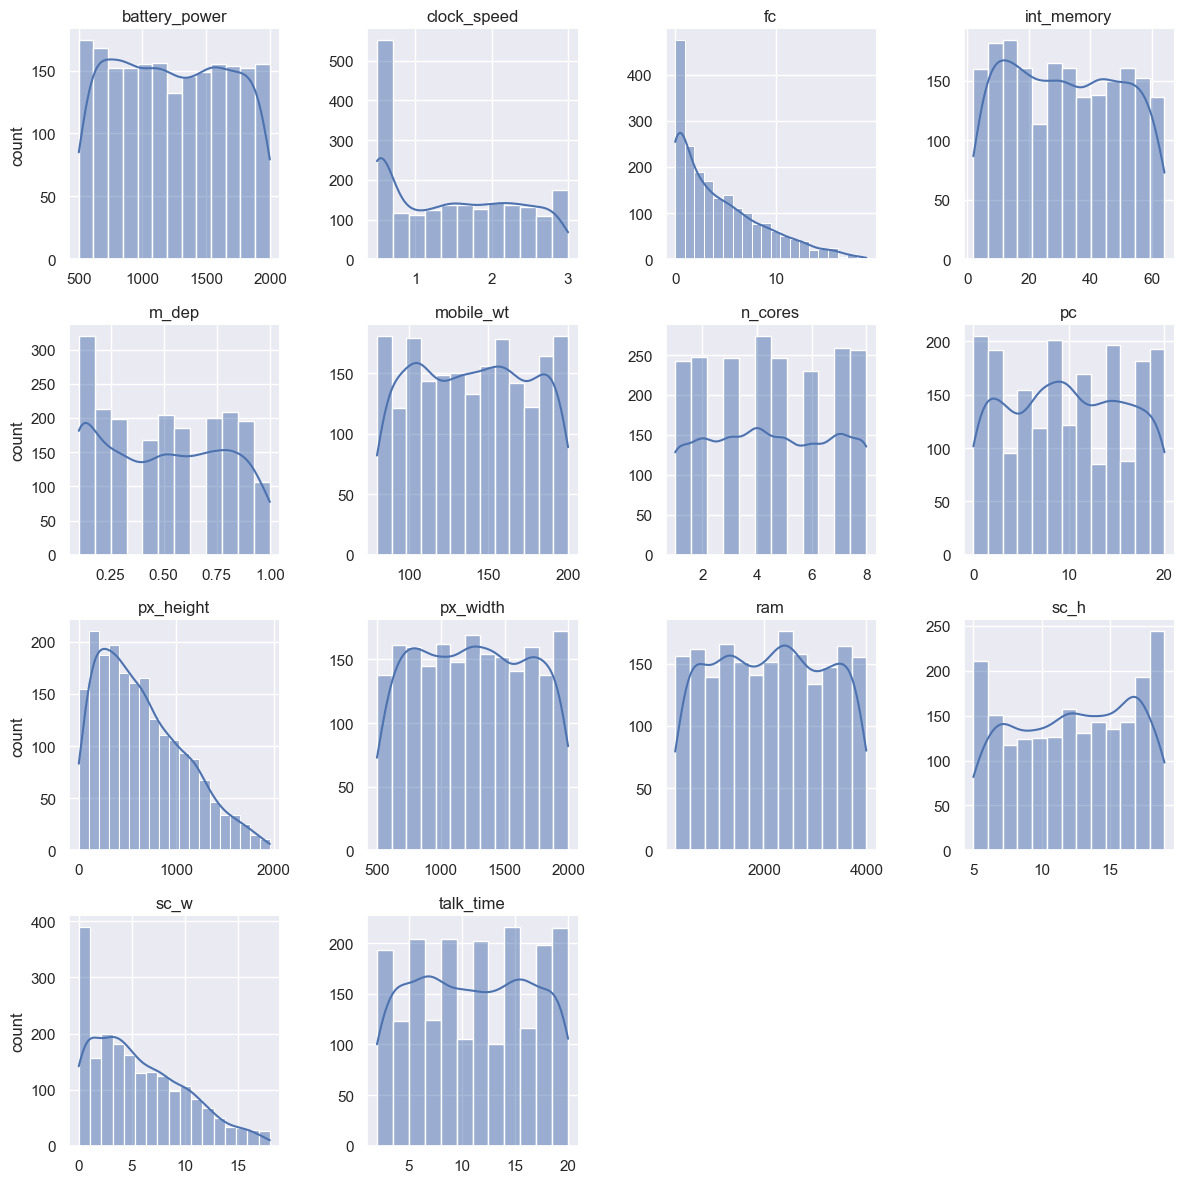

In [7]:
# Визуализация числовых признаков.
def plot_hist(data, **kwargs):
    sns.histplot(data=data, kde=True, **kwargs)

g = sns.FacetGrid(
    pd.melt(df_numeric.drop('price_range', axis=1)), 
    col='variable', col_wrap=4, sharex=False, sharey=False
)
g.map_dataframe(plot_hist)
g.set_titles('{col_name}')
g.set_axis_labels('', 'count')
plt.show()

### Корреляция признаков.

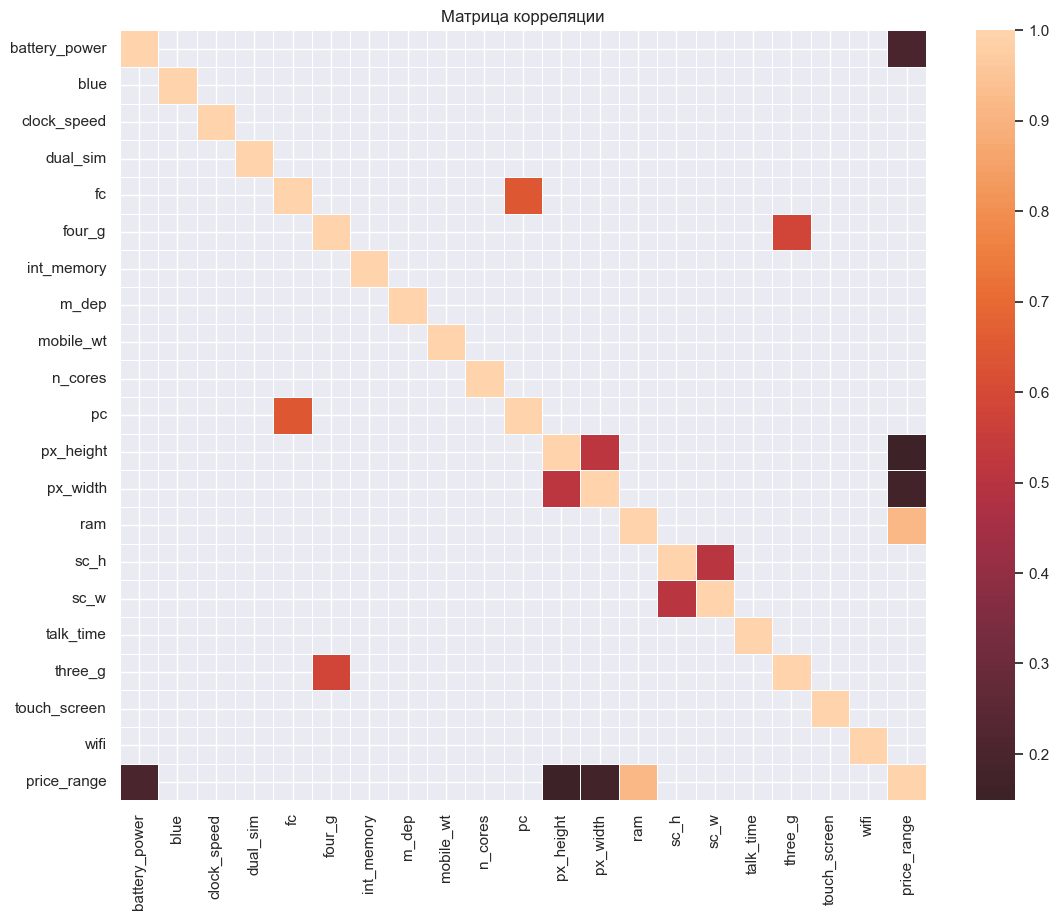

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200723
blue,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clock_speed,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dual_sim,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
four_g,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.584246,NaN,NaN,NaN
int_memory,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_dep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Проверка корреляции признаков.
corr_matrix = df.corr().mask(abs(df.corr()) < 0.1, np.nan)
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix, annot=False, center=0, linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()
corr_matrix

Среди наиболее коррелирующих признаков следует выделить
- pc/fc = 0.65 - сильная взаимозависимость разрешения основной и фронтальной камер
- px_height/px_width = 0.51 - больше ширина/больше высота, один из параметров можно удалить
- three_g/four_g = 0.59 - 3G является предшественником 4G, поэтому наблюдается корреляция
- price_range/battery = 0.2 - можно выделить небольшую корреляцию между ценой и объемом аккумулятора
- price_range/ram = 0.92 - цена сильно зависит от объема оперативной памяти
- price_range/px_height и price_range/px_width ~= 0.16 - слабая взаимосвязь разрешения экрана и цены

In [ ]:
# Матрица рассеяния (первая половина).
sns.pairplot(df[list(df.columns[:10]) + ['price_range']], hue='price_range')

In [ ]:
# Матрица рассеяния (вторая половина).
sns.pairplot(df[df.columns[10:]], hue='price_range')

Полученные графики подтверждают обнаруженные корреляции. Рассмотрим наиболее интересные из них более детально.

In [ ]:
def scatter_with_line(dataframe, x, y, title=None):
    """Отображение рассеяния двух признаков."""
    sns.scatterplot(x=x, y=y, data=dataframe, color='blue', alpha=0.45, s=30)
    sns.lineplot(x=x, y=y, data=dataframe, color='red')    
    plt.title(title if title else f'{x} VS {y}')

In [ ]:
# Frontal Camera VS Primary Camera.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
scatter_with_line(df, x='pc', y='fc', title='Frontal Camera VS Primary Camera')

# Убедимся в отсутствии корреляции PC(FC)/Price Range.
plt.subplot(1, 2, 2)
scatter_with_line(df, x='pc', y='price_range', title='Primary Camera VS Price Range')
plt.show()

Между разрешениями фронтальной и основной камер действительно есть прямая зависимость, что логично. При этом цена не зависит от разрешения камер.

In [ ]:
# Battery Power VS Price Range.
plt.figure(figsize=(12, 5))
scatter_with_line(df, x='price_range', y='battery_power', title='Battery Power VS Price Range')
plt.show()

Можно наблюдать слабую зависимость между ценой и объемом аккумулятора, что подтверждает корреляцию в 20%.

In [ ]:
# RAM VS Price Range.
plt.figure(figsize=(12, 5))
scatter_with_line(df, x='price_range', y='ram', title='RAM VS Price Range')
plt.show()

Здесь явно видно зависимость (92%) ценовой категории от объема оперативной памяти.
Остальные атрибуты коррелируют слабо и не нуждаются в изучении, сохраним данные для дальнейшего анализа.

In [ ]:
df.to_csv(r'data/clean.csv', index=False)